<strong>Parameters:</strong>
1. Cross Validation nubmer: 10 (both inner and outer)
2. n_estimator: 100
3. max_depth: 5,6,7,8
4. X <- GPS and age, female, hign.educ....

<strong>Result:</strong>
- best max depth: 3


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
my_data = pd.read_csv('/home/ubuntu/phenotype_and_GPS.csv', header=0)
my_data['KEY'] = my_data['KEY'].astype(str)

#### I placed NAN to mean value... should I replace it?

In [4]:
my_data.fillna(my_data.mean(), inplace=True)

In [5]:
my_data.head()

,KEY,AD,DEPRESSION_SUB,IQ,NEUROTICISM,WORRY_SUB,INSOMNIA,PTSD,SNORING,CP,...,income,married,abcd_site,vol,BMI,NIH_totcomp,NIH_flucomp,CBCL_TotProb,CBCL_Internal,CBCL_External
0,NDARINV003RTV85,-5.780160,0.002583,-2.917600,0.013433,-0.000821,-0.307129,0.000000,0.063292,-2.156561,...,8.0,1.000000,6,-1.050932,20.480539,0.632147,0.605564,-0.789382,-0.731957,-0.589077
1,NDARINV007W6H7B,9.133668,0.002060,0.369931,0.000064,-0.001469,0.438520,0.017525,0.021098,-3.683131,...,10.0,1.000000,22,1.293196,18.234286,1.069812,0.887103,0.268149,0.534371,-0.418541
2,NDARINV00BD7VDC,2.059180,0.006631,-4.261953,0.012193,-0.016278,0.071778,0.010899,0.037388,-4.160142,...,10.0,1.000000,7,1.129021,16.329800,0.632147,1.544026,-0.065808,-0.008341,-0.248005
3,NDARINV00J52GPG,8.591499,0.004259,-2.582771,0.013623,0.000487,-0.328521,0.019801,0.022991,-4.682147,...,6.0,1.522359,17,0.020277,19.061896,0.329044,0.237332,-0.399765,-0.912861,-0.589077
4,NDARINV00NPMHND,3.104598,0.000878,-3.145087,0.013695,-0.013129,0.014641,0.000000,-0.008245,-4.843486,...,8.0,1.000000,17,0.663349,17.663472,-0.680849,-1.365205,1.325680,3.247931,-0.248005


#### CONSTANTS:

In [6]:
k_fold = 10

num_samples = len(my_data)
each_fold_size = int(num_samples/k_fold) +1

print('num_samples: ', num_samples)
print('fold_size: ', each_fold_size)

num_samples:  4567
fold_size:  457


#### PARAMETERS:

In [7]:
X = my_data.iloc[:, 1:35]
X.head()
features = X.columns

In [8]:
y = my_data['NIH_totcomp']
y.head()

0    0.632147
1    1.069812
2    0.632147
3    0.329044
4   -0.680849
Name: NIH_totcomp, dtype: float64

In [9]:
X = X.to_numpy()
y = y.to_numpy().ravel()

In [10]:
def plot_feature_importances(model):
    n_features = 34
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

In [11]:
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)

----------------------------
Loop:  1


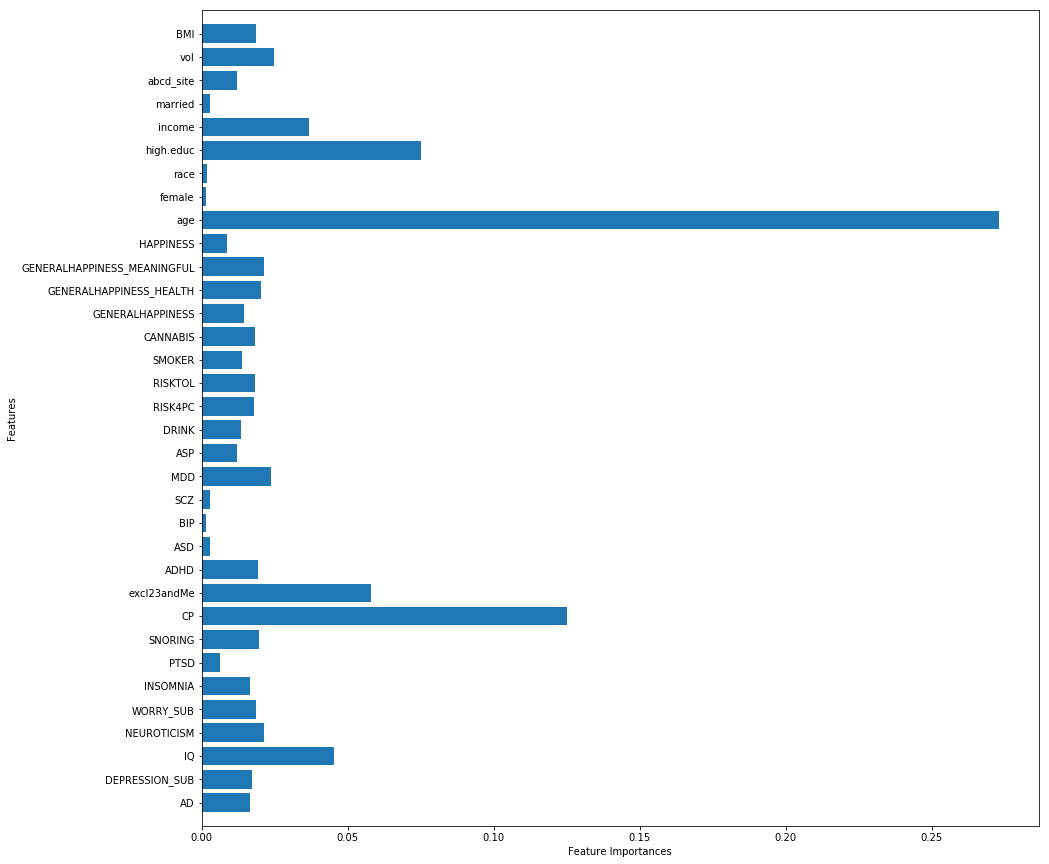

Feature Importances:
[0.01645082 0.01716398 0.04526731 0.02138918 0.0186834  0.01665935
 0.00616726 0.0197835  0.12515878 0.05801558 0.01919938 0.0030037
 0.0016145  0.00294444 0.02365796 0.01223752 0.01331375 0.01800478
 0.01839484 0.01385502 0.01828679 0.01444305 0.0201545  0.02130512
 0.00850938 0.27303423 0.00161397 0.00172139 0.07497547 0.03673303
 0.00275617 0.01218766 0.02475884 0.01855534]


best train parameter:  {'max_depth': 7, 'n_estimators': 100}
best train score:  0.1906988459745865


test score:  0.1131120103431561
----------------------------
----------------------------
Loop:  2


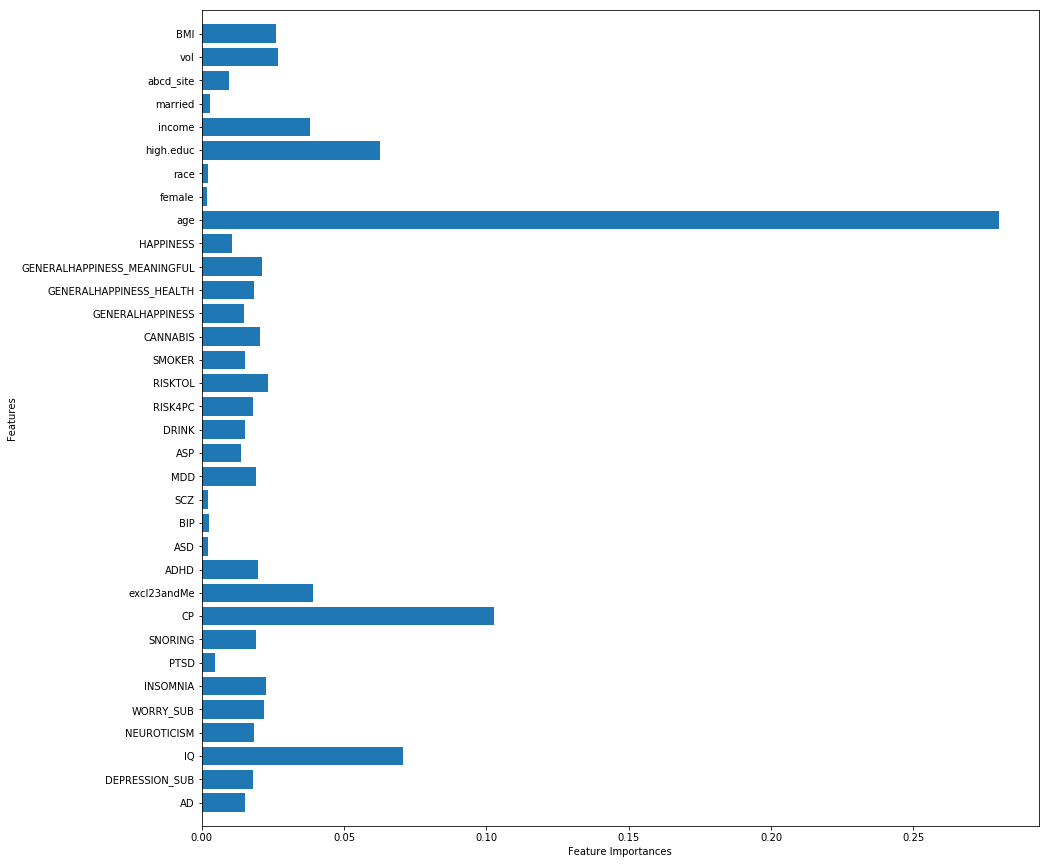

Feature Importances:
[0.01536536 0.01788922 0.07063095 0.01852804 0.02197426 0.02271915
 0.00467086 0.01899341 0.1027882  0.0389701  0.01986658 0.00237366
 0.00244932 0.0022277  0.01902063 0.01363179 0.01534485 0.01811005
 0.02335124 0.01505137 0.02062094 0.01492998 0.01832717 0.02129204
 0.01077131 0.28001959 0.00187112 0.00213631 0.06251806 0.0381772
 0.00293235 0.00943748 0.02675031 0.02625938]


best train parameter:  {'max_depth': 7, 'n_estimators': 100}
best train score:  0.17873718353191076


test score:  0.15747570127566257
----------------------------
----------------------------
Loop:  3


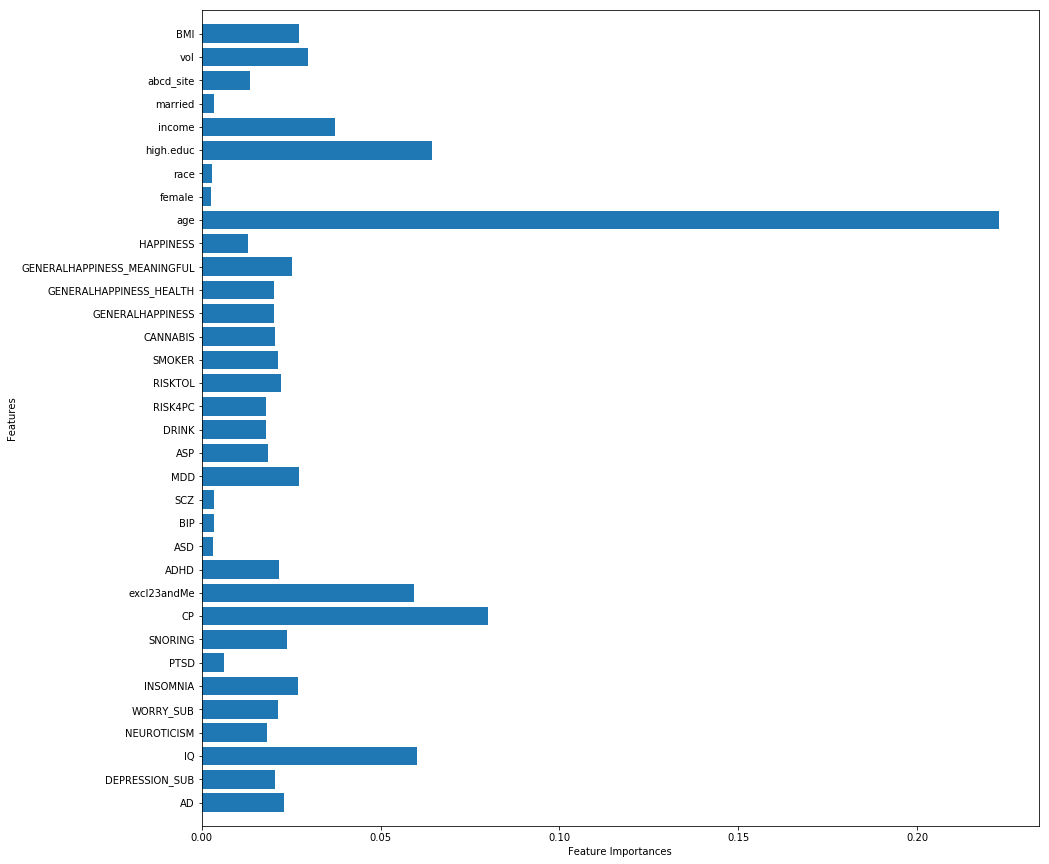

Feature Importances:
[0.02314617 0.02042667 0.06009162 0.01828651 0.02132149 0.02694011
 0.00609979 0.02376472 0.0799243  0.05943461 0.02161343 0.00324548
 0.00331149 0.00356552 0.02720767 0.0185703  0.01798785 0.01806973
 0.0222983  0.02139354 0.02054863 0.02033154 0.02012985 0.02515433
 0.01305009 0.22288393 0.00272308 0.00295389 0.06449535 0.03736553
 0.00342953 0.01346553 0.02964435 0.02712508]


best train parameter:  {'max_depth': 8, 'n_estimators': 100}
best train score:  0.18011477239418644


test score:  0.20023821310709256
----------------------------
----------------------------
Loop:  4


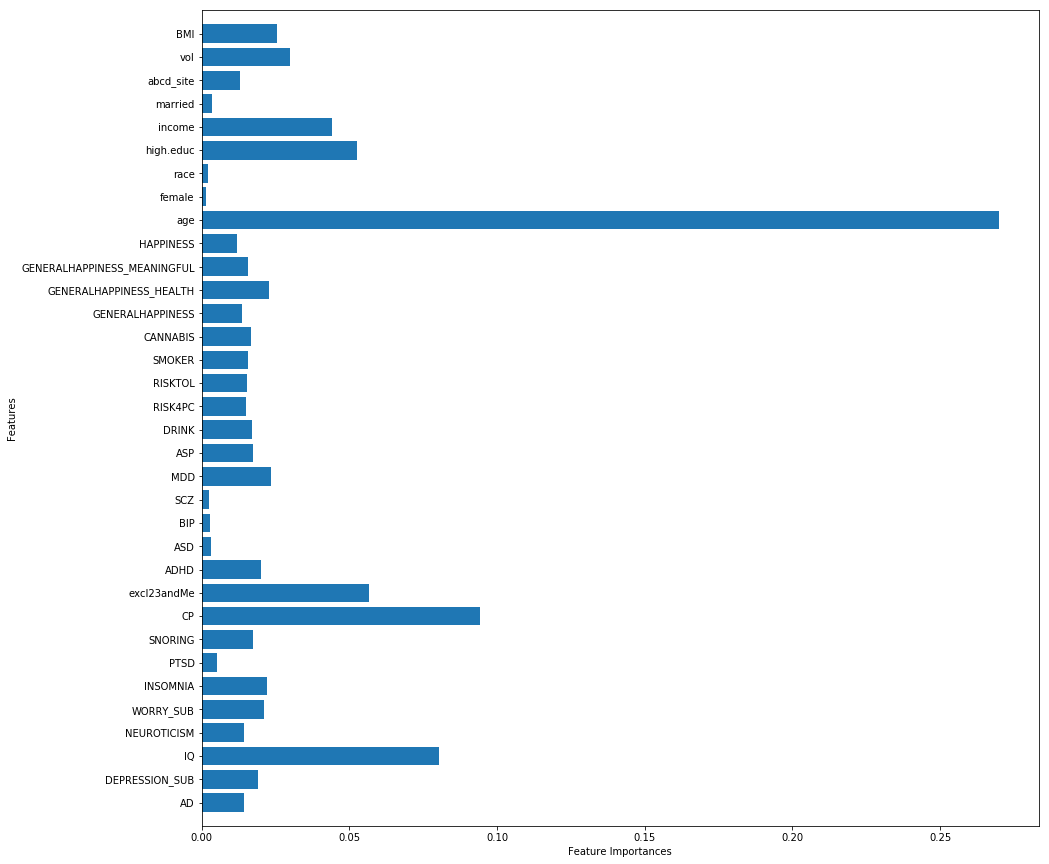

Feature Importances:
[0.01419893 0.01901027 0.08046566 0.01419168 0.0210898  0.02204086
 0.0052794  0.01748901 0.09408405 0.05657086 0.02021135 0.00311959
 0.00277534 0.00239859 0.02360987 0.01725437 0.01710376 0.01514221
 0.01537867 0.01572013 0.01659923 0.01373076 0.02291292 0.01575204
 0.01179626 0.2698743  0.00156784 0.00225328 0.05252748 0.04417583
 0.00335941 0.01300491 0.02984496 0.02546636]


best train parameter:  {'max_depth': 7, 'n_estimators': 100}
best train score:  0.1794762867980323


test score:  0.17245091557933567
----------------------------
----------------------------
Loop:  5


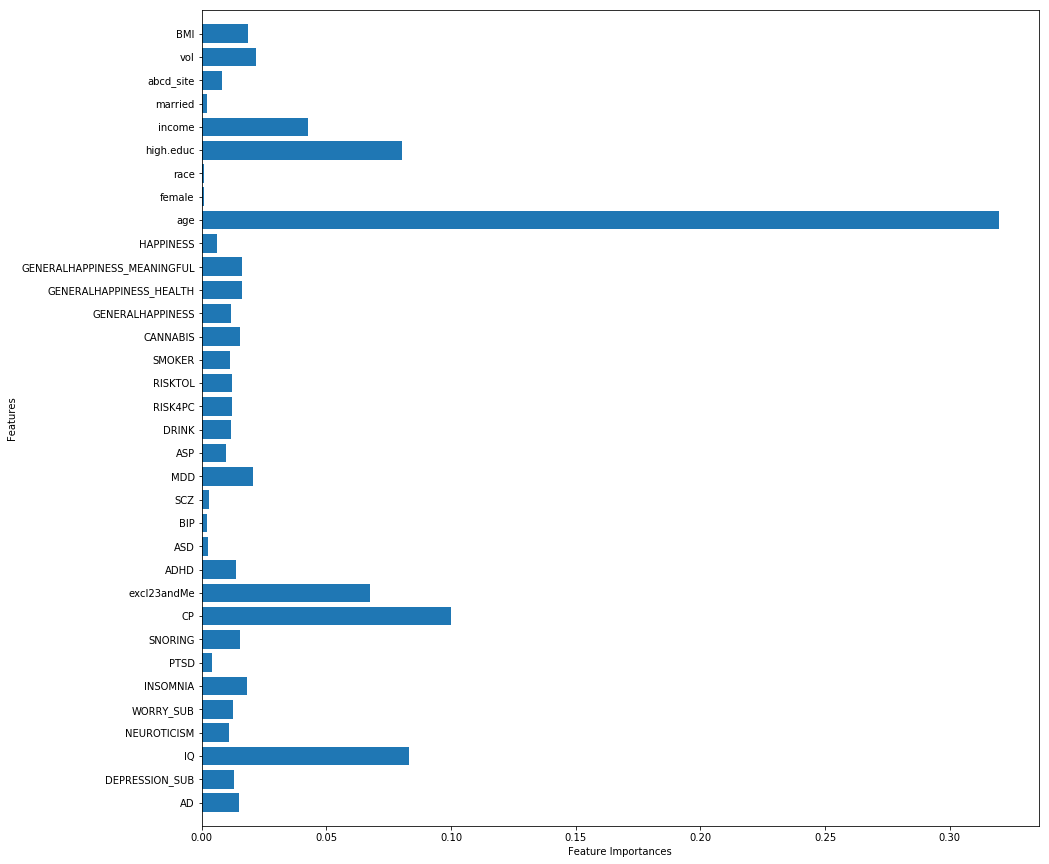

Feature Importances:
[0.01513678 0.01315167 0.0831642  0.01084834 0.01272012 0.01812562
 0.00395187 0.01536808 0.09994219 0.06762678 0.01387363 0.00256297
 0.00195645 0.00302786 0.02043577 0.00987846 0.01162881 0.0121779
 0.01231549 0.01135337 0.01548506 0.01172363 0.0161128  0.01624741
 0.0062751  0.31966029 0.00110905 0.00081516 0.08020218 0.04271592
 0.00206651 0.00811039 0.02170058 0.01852955]


best train parameter:  {'max_depth': 6, 'n_estimators': 100}
best train score:  0.17637728993455523


test score:  0.19486061271188515
----------------------------
----------------------------
Loop:  6


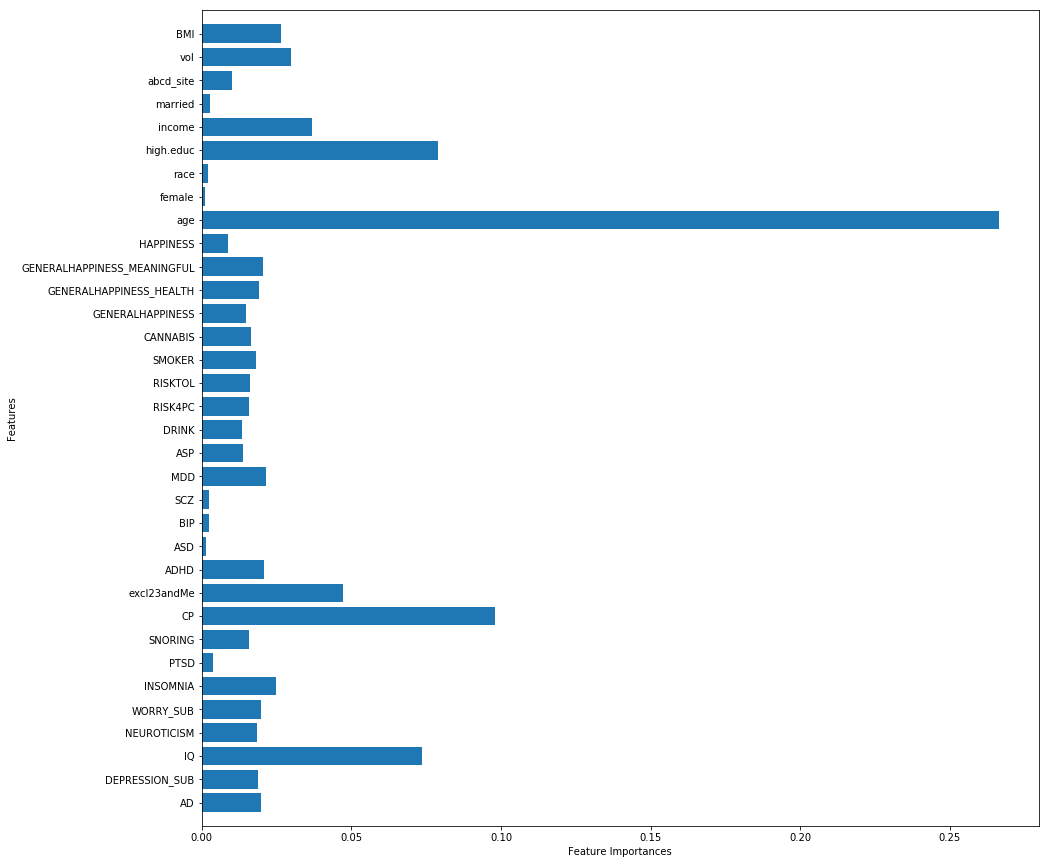

Feature Importances:
[0.01967549 0.01895469 0.07360757 0.01851669 0.01984733 0.02488745
 0.00368561 0.01572295 0.0980374  0.04712493 0.02080874 0.00153478
 0.00246172 0.00228411 0.02132439 0.01392502 0.0136095  0.01568973
 0.01619459 0.01801897 0.01631174 0.01474842 0.01926733 0.02049892
 0.00868604 0.26631819 0.00123508 0.00211336 0.07894039 0.03694943
 0.00271921 0.01005901 0.02982571 0.02641551]


best train parameter:  {'max_depth': 7, 'n_estimators': 100}
best train score:  0.1845135279536798


test score:  0.1323234770090823
----------------------------
----------------------------
Loop:  7


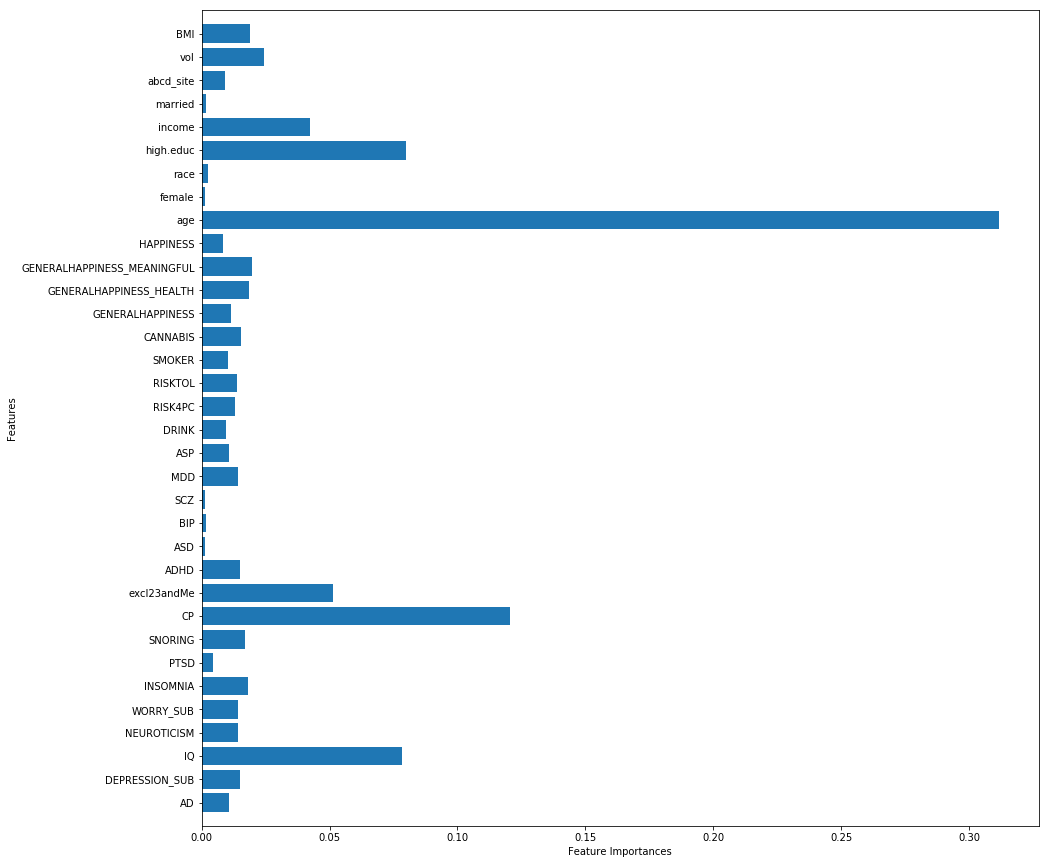

Feature Importances:
[0.01066586 0.01515147 0.0784069  0.01436382 0.0143069  0.01822687
 0.00443101 0.01690046 0.12047252 0.05122295 0.01512292 0.0011219
 0.00157211 0.0011674  0.01432178 0.01058837 0.0095839  0.01294289
 0.01361202 0.01037131 0.01520488 0.01148737 0.01858885 0.01980276
 0.00813576 0.31168041 0.00120016 0.00251735 0.08005622 0.04236825
 0.00185273 0.00912359 0.02451513 0.01891317]


best train parameter:  {'max_depth': 6, 'n_estimators': 100}
best train score:  0.17839093854788424


test score:  0.18572200823707452
----------------------------
----------------------------
Loop:  8


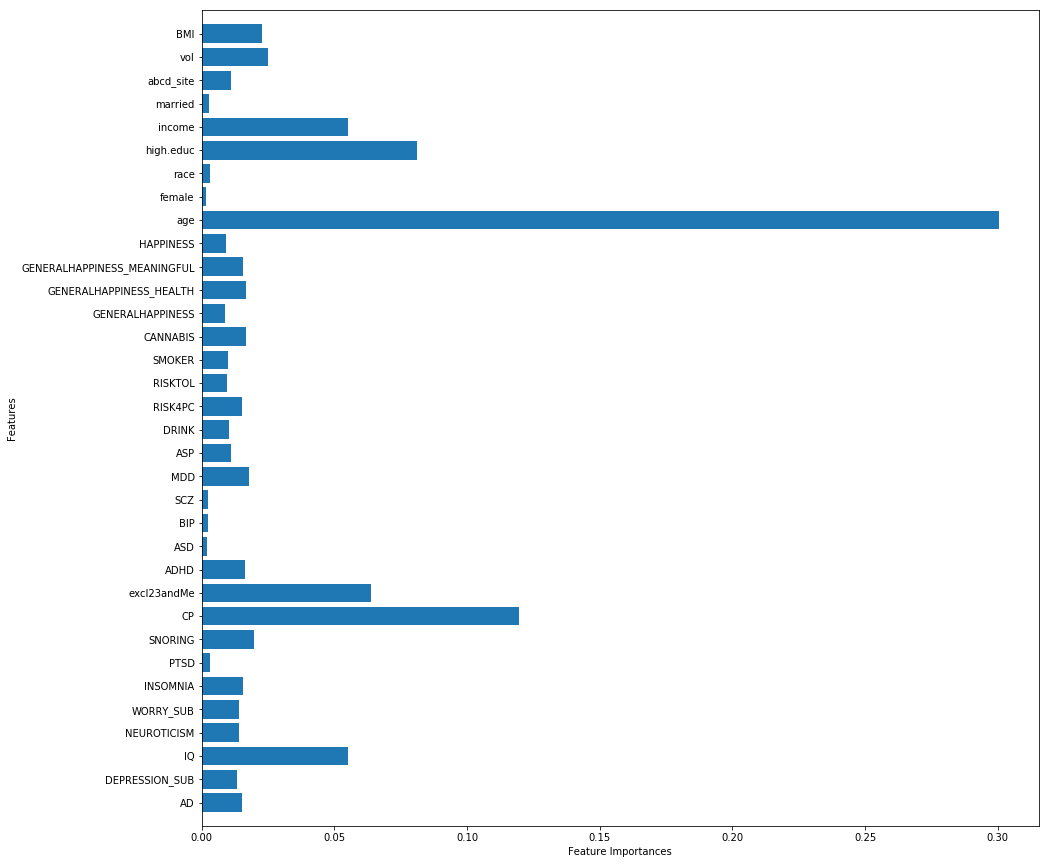

Feature Importances:
[0.01534435 0.01326308 0.05521782 0.01406563 0.01413764 0.01546247
 0.003242   0.0195775  0.11942919 0.06385988 0.01643939 0.00215213
 0.00218867 0.00241392 0.01779221 0.01089104 0.01028921 0.01500106
 0.00959627 0.01009246 0.01661762 0.00867071 0.01671503 0.01544286
 0.00923422 0.30041305 0.00145324 0.00301662 0.08108468 0.05531772
 0.00261795 0.01120599 0.02503244 0.02272193]


best train parameter:  {'max_depth': 6, 'n_estimators': 100}
best train score:  0.17083916877107183


test score:  0.2591820582576676
----------------------------
----------------------------
Loop:  9


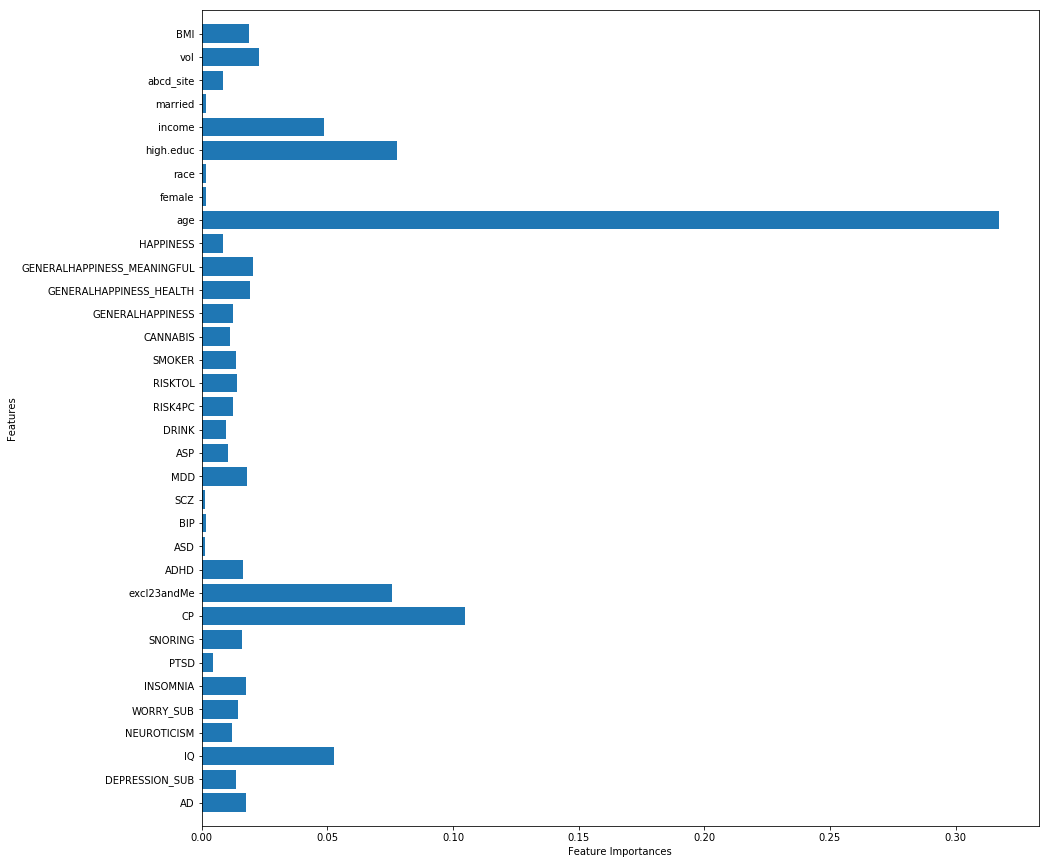

Feature Importances:
[0.01773531 0.0136613  0.05279673 0.01218714 0.01459389 0.01778933
 0.00438966 0.01612494 0.104956   0.07571795 0.01662656 0.00151161
 0.00166679 0.00142343 0.01821952 0.01049857 0.00961202 0.01255478
 0.01406512 0.01357932 0.01114448 0.01233326 0.01905638 0.020562
 0.00854622 0.31721309 0.00164176 0.00166654 0.07753967 0.04885353
 0.00164606 0.00853482 0.02280887 0.01874337]


best train parameter:  {'max_depth': 6, 'n_estimators': 100}
best train score:  0.1741870137650825


test score:  0.22646108010068933
----------------------------
----------------------------
Loop:  10


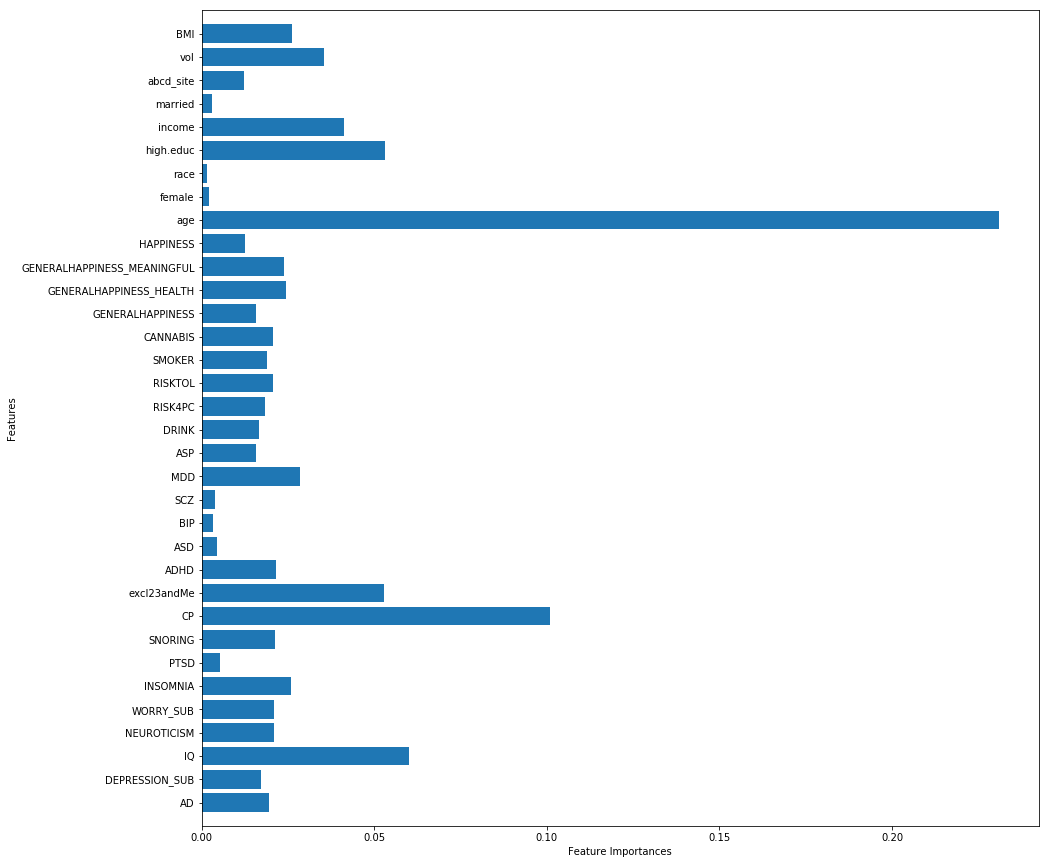

Feature Importances:
[0.01949182 0.01727866 0.06011554 0.02103802 0.02102819 0.02601586
 0.0052064  0.02131227 0.10093024 0.05288839 0.02139498 0.00448857
 0.00316601 0.00395018 0.02846869 0.01561693 0.01668363 0.01845841
 0.02064424 0.01902932 0.02054217 0.01568317 0.02429936 0.02384765
 0.01261335 0.23097491 0.00207262 0.00143073 0.05323584 0.0413133
 0.00293335 0.01234426 0.03545437 0.02604855]


best train parameter:  {'max_depth': 8, 'n_estimators': 100}
best train score:  0.18529457338685643


test score:  0.15652181534371656
----------------------------


In [12]:
outerloop = 0

for train_index, test_index in outer_cv.split(X, y):
    outerloop += 1
    print('----------------------------')
    print('Loop: ', outerloop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    params = {'n_estimators': [100],
              'max_depth': [5,6,7,8]}
    
    rf = RandomForestRegressor()
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='r2', n_jobs=-1, return_train_score=True)
    
    rf_grid.fit(X_train, y_train)
    y_pred_test = rf_grid.predict(X_test)
    #y_pred_train = rf_grid.predict(X_train)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    #print(result)
    result.to_csv("intel_optimize_2.csv", index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("Feature Importances:\n{}".format(best_est.feature_importances_))
    pd.DataFrame(best_est.feature_importances_).to_csv("intel_feature_importances_2.csv", index = False)
    
    print('\n')
    print('best train parameter: ', rf_grid.best_params_)
    print('best train score: ', rf_grid.best_score_)
    print('\n')
    print('test score: ', r2_score(y_test, y_pred_test))
    print('----------------------------')

##### score is R2 score